# Supervised Learning - Regression

## Agenda
- Types of Regression
  - Linear Regression
    - Simple Linear Regression
      - Train Test Split
    - Multiple Linear Regression
      - Overfitting and Underfitting
  - Non Linear Regression
    - Polynomial Regression
- Model Evaluation and Validation
   - Cross Validation Techniques
   - Performance metrics in Regression
     - Mean Squared Error (MSE)
     - Mean Absolute Error (MAE)
     - Root Mean Squared Error (RMSE)
     - R-Squared
- Regularization Techniques
  -  Lasso Regression
  -  Ridge Regression
- Hyperparameter Tuning
  - GridSearchCV
  - RandomSearchCV
- Pipelines
  - sci-kit learn pipelines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)
x =  np.random.normal(0,1, 100)
y = -2*x + np.random.rand(100)

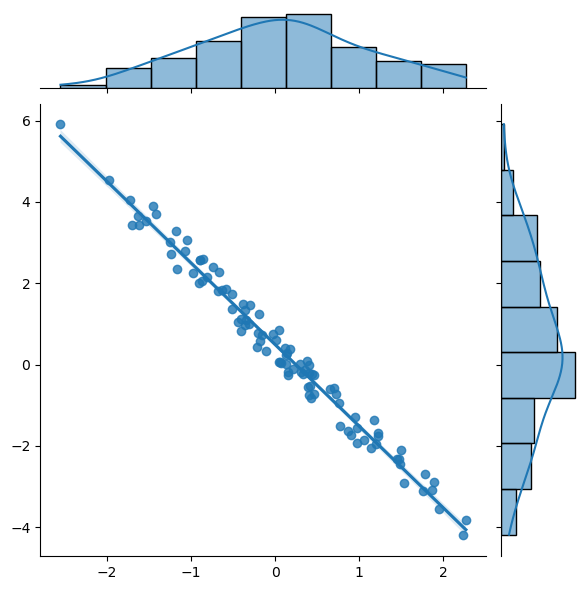

In [3]:
sns.jointplot(x=x, y = y, kind = 'reg')
plt.show()

# Types of Regression
There are two types of linear regression:
- Simple linear regression
- Multiple linear regression

### __3.4.1 Simple Linear Regression__ ###**Simple Linear Regression**Definition: Simple linear regression models the relationship between one independent variable and the dependent variable as a straight line.The equation for Simple Linear Regression is: $$ y = \beta_0 + \beta_1x $$where:- $y$ is the dependent variable- $x$ is the independent variable- $β_0$ is the intercept- $β_1$ is the slope

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/Simple_linear_regression.jpg)

### __3.4.2 Multiple Linear Regression__ ###
**Multiple Linear Regression**
Definition: Multiple linear regression models the relationship between two or more independent variables/predictors/features and the dependent variable as a straight line.
The equation for Multiple Linear Regression:
 $$ {y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_ n $$
- $ x_1, x_2, \ldots, x_n $ are the predictor variables,
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each predictor.

In [4]:
# Let us see how to fit a Simple Linear Regression model on a dataset

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read the dataset

df = pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [7]:
# Display the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


There are no missing values in the dataset.

In [8]:
# Seggregate the input feature and target in variable X, y respectively.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
# Perform Train Test Split
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
X_train.index

Index([ 79, 197,  38,  24, 122, 195,  29,  19, 143,  86,
       ...
       121, 199,  20, 188,  71, 106,  14,  92, 179, 102],
      dtype='int64', length=160)

In [12]:
y_train.index

Index([ 79, 197,  38,  24, 122, 195,  29,  19, 143,  86,
       ...
       121, 199,  20, 188,  71, 106,  14,  92, 179, 102],
      dtype='int64', length=160)

In [13]:
# Lets fit(Train) the model

In [14]:
# Import LinearRegression Model from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [15]:
# Create an instance of LinearRegression Class
lin_reg = LinearRegression()

In [16]:
lin_reg

LinearRegression()

In [17]:
lin_reg.fit(X_train, y_train)  
# At this step the model learns the realtionship between input and the output and finds the trained parameters
# (Coef. of regression & the Intercept)

LinearRegression()

In [18]:
#Sales  = 7.1196384305929525 + 0.04652973 * TV
print(f'The Coefficient of Regression for TV is {lin_reg.coef_}')
print(f'The Intercept is {lin_reg.intercept_}')

The Coefficient of Regression for TV is [0.04652973]
The Intercept is 7.1196384305929525


In [19]:
y_test_predicted = lin_reg.predict(X_test)

In [20]:
y_test_predicted[:5]

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877])

In [21]:
y_test[:5]

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

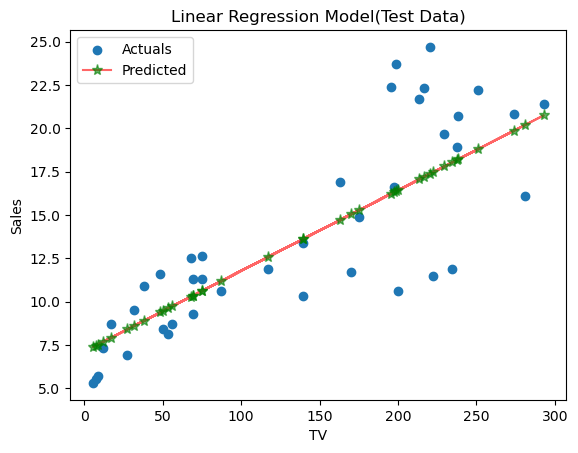

In [22]:
plt.scatter(X_test,y_test, label = 'Actuals')
plt.plot(X_test,y_test_predicted, color = 'red', label = 'Predicted', marker = '*', mfc = 'green',
         ms = 8, mec = 'green', alpha = 0.6)
plt.legend(loc = 'upper left')
plt.title('Linear Regression Model(Test Data)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

### Overfitting and Underfitting
When developing machine learning models, achieving the right balance between complexity and simplicity is crucial. This balance is covered in the concepts of overfitting and underfitting.

**Overfitting**
- Overfitting occurs when a model learns the noise and details in the training data too well to the extent that it negatively impacts its performance on new unseen data.
- Sign: High accuracy on training data but poor accuracy on test data.
- Cause: Model is too complex (too many parameters).
  
**Underfitting**
- Underfitting happens when a model is too simple to capture the underlying pattern of the data.
- Sign: Poor accuracy on both training and test data.
- Cause: Model is too simple (too few parameters).

**Bias-Variance Tradeoff**
- Bias: Error due to overly simplistic assumptions in the learning algorithm. High bias can cause underfitting.- Variance: Error due to excessive complexity in the learning algorithm. High variance can cause overfitting.
**Tradeoff**- Low Bias & High Variance: Model fits the training data very well but may fail to generalize (overfitting).- High Bias & Low Variance: Model does not fit the training data well and misses the underlying trend (underfitting).- Optimal Tradeoff: Finding a balance where the model performs well on both training and test data, minimizing overall error.  Understanding and managing the bias-variance tradeoff is key to building models that generalize well to unseen data.

In [23]:
# Lets Look How to check for overfittig and underfitting

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
y_test_predicted = lin_reg.predict(X_test)
y_train_predicted = lin_reg.predict(X_train)

In [26]:
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted)
r2_train = r2_score(y_train, y_train_predicted)
r2_test = r2_score(y_test, y_test_predicted)


In [27]:
print(f'Training MSE {mse_train:.3f}')
print(f'Test MSE {mse_test:.3f}')
print(f'Training R2 {r2_train:.3f}')
print(f'Test R2 {r2_test:.3f}')

Training MSE 10.604
Test MSE 10.205
Training R2 0.591
Test R2 0.677


In [28]:
# Check for overfitting or underfitting
if mse_train < mse_test or r2_train > r2_test:
    if abs(r2_train - r2_test) > 0.1:
        print("Model may be overfitting to the training data.")
    else:
        print("Model performs reasonably well but check for slight overfitting.")
elif mse_train > mse_test and r2_train < r2_test:
    print("Model may be underfitting, consider increasing model complexity.")
else:
    print("Model has a balanced fit on both training and testing datasets.")

Model may be underfitting, consider increasing model complexity.


**Observation**
 Mean Squared Error (MSE) and R-squared (R²) values are calculated for both training and test datasets.
 - MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value.
 - R² provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model
Overfitting: The model performs well on the training data but poorly on the test data (higher R² on training or lower MSE on training compared to testing).
Underfitting: The model performs poorly on both training and test data, or better on the test data compared to the training data, which could suggest that the model is too simple.

# Non Linear Regression
## Polynomial Regression

**Polynomial Regression** is a subset of linear regression that includes polynomial terms.The relationship between an independent variable (x) and a dependent variable (y) is modeled as an nth-degree polynomia

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_04/Polynomial.png)

- Polynomial regression is also called as the special case of multiple linear regression. Some polynomial terms are added to the multiple linear regression equation to convert into polynomial regression.
- It is a linear model with some modifications made to increase its accuracy.
- The dataset used in polynomial regression for training is non-linear.

## Steps

First, import the relevant libraries.
- Next, assign the **PolynomialFeatures** of degree 8 to the variable **poly_features**.
- Fit the values of X_test and X_train  and assign them to the variable **X_test_poly** and **X_train_poly**.
- Finally, get the linear regression function and assign it to the variable **pol_features**.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly_features = PolynomialFeatures(degree = 5)
poly_features.fit(X_train)
X_train_poly =  poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [31]:
lin_reg_poly =  LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [32]:
y_train_pred_poly = lin_reg_poly.predict(X_train_poly)
y_test_pred_poly = lin_reg_poly.predict(X_test_poly)

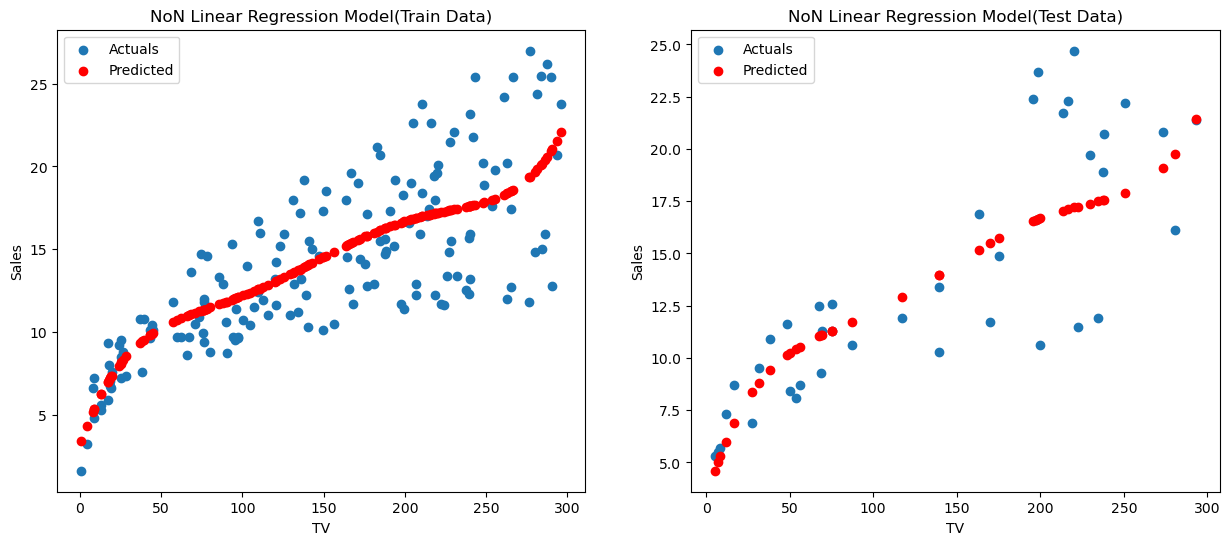

In [33]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
plt.scatter(X_train['TV'],y_train, label = 'Actuals')
plt.scatter(X_train['TV'],y_train_pred_poly, color = 'red', label = 'Predicted')
plt.legend(loc = 'upper left')
plt.title('NoN Linear Regression Model(Train Data)')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,2,2)
plt.scatter(X_test['TV'],y_test, label = 'Actuals')
plt.scatter(X_test['TV'],y_test_pred_poly, color = 'red', label = 'Predicted')
plt.legend(loc = 'upper left')
plt.title('NoN Linear Regression Model(Test Data)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [34]:
mse_train = mean_squared_error(y_train, y_train_pred_poly)
mse_test = mean_squared_error(y_test, y_test_pred_poly)
r2_train = r2_score(y_train, y_train_pred_poly)
r2_test = r2_score(y_test, y_test_pred_poly)

print(f'Training MSE {mse_train:.3f}')
print(f'Test MSE {mse_test:.3f}')
print(f'Training R2 {r2_train:.3f}')
print(f'Test R2 {r2_test:.3f}')

Training MSE 10.066
Test MSE 10.205
Training R2 0.612
Test R2 0.677


# Model Evaluation and Validation Techniques
## Performance Metrics
In Regression, Evaluation metrics gives the quantitative measures of models performance, which helps in assessing and selection of the models. The key metrics are :

### Mean Squared Error (MSE) 
it calculates the average of the squares of the errors, which are the differencs between actual values and the predicted values. A lower value of MSE suggest a better model performance. Mathematically, 
$$ MSE =  \frac{\sum_{i=1}^n {(y_{i} - \hat{y_i})}^2}{n}
$$

where, 

$$
\hat{y_i} =  \beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}
$$

or We can rewrite :
$$
MSE =   \frac{\sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2}{n}
$$

where

- $n$ is the number of observations
- $p$ is the number of input features
- $x$ is input feature values
- $y$ is actual output
- $\hat{y}$ is predicted output

### Root Mean Squared Error (RMSE) 
RMSE is the square root of MSE, providing the measure of the average magnitude of the errors in the predicted values. Since the sqaure root reverses the squaring operation of MSE, RMSE ends up having the same units as the original target variables. Mathemtically

$$
RMSE =   \sqrt{\frac{\sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2}{n}}
$$

where

- $n$ is the number of observations
- $p$ is the number of input features
- $x$ is input feature values
- $y$ is actual output
- $\hat{y}$ is predicted output

### Mean Absolute Error (MAE)
MAE calculates the average of the absolute errors between actual and predicted values. it is less sensitive  to outliers as compared MSE and RMSE, Mathematically

$$
MAE =   \frac{\sum_{i=1}^n |(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))|}{n}
$$



### R - Squared (R2)

R - Squared explains how much the variation of the dependent variable `y` can be attributed to changes in independent variable `x`. R Squared value ranges between (0-1)

- **0** - This indicates that the model explains none of the variance in the dependent variable. The dependent variable has no explanatory powers for the changes in target variable
- **1** -  This represents a perfect fit. The model explains all of the variance in the dependent variable. The changes in `y` are perfectly captured by changes in `x`

While a higher R2 Score generally suggest that a model is a better fit, but it needs to be considered along with other metrics like MSE, RMSE or MAE

Mathematically.

$$
\text{R-Sqaured (r2 score)} =  1 - \frac{\text{RSS}}{\text{TSS}}
$$


where
$$
\text{RSS or SSR or Residual Sum of Sqaures} =  \sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2
$$

$$
\text{TSS or SST or Total Sum of Sqaures} =  \sum_{i=1}^n {(y_{i} - \overline{y})}^2
$$

where

- $n$ is the number of observations
- $p$ is the number of input features
- $x$ is input feature values
- $y$ is actual output
- $\hat{y}$ is predicted output
- $\overline{y}$ is mean of the target variable


## Cross Validation Technique

Cross-validation is a machine learning technique that evaluates model performance on unseen data by dividing the data into multiple folds. In each iteration, one fold is used as a validation set and the remaining as training data. This process is repeated such that each fold serves as the validation set once. The results from all iterations are averaged to provide a robust estimate of model performance. Some of the common cross-validation techniques are:

**1. K-Fold Cross-Validation**
In K-Fold Cross validation, the dataset is divided into k equally sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold used exactly once as the test set. The results are averaged to produce a single performance estimate.
* Pros: Provides a more accurate estimate of model performance.
* Cons: Computationally intensive for large datasets.

**2. Stratified K-Fold Cross-Validation**Similar to K-Fold but ensures that each fold has the same proportion of different classes as the original dataset. This is especially useful for imbalanced datasets.* Pros: More reliable performance estimates for imbalanced datasets.* Cons: Still computationally intensive.

**Now, Lets build a regression model, perform analysis on it, and evaluate the models performance**

In [35]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
# read the dataset
df =  pd.read_csv('housing_with_ocean_proximity.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [38]:
# Display the statistical summary
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [39]:
# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
# ocean_proximity sis a categorical variable for which we would do One Hot Encoding using get Dummies

In [41]:
# Missing Values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [42]:
# There are 207 missing values in total_bedrooms, which is approximately 1% of total. 
# replace missing values with the median value.

In [43]:
df['total_bedrooms'] =  df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [44]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [45]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [46]:
# Apply get_dummies of dataframe, with drop_first True, with prefix 'op', and dtype int

df = pd.get_dummies(df, drop_first =True, prefix ='op', dtype = 'int')

In [47]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0


In [48]:
# Split the data in Feature and target and perform train test split in 70:30

X =  df.drop(columns = ['median_house_value'])
y = df['median_house_value']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size =  0.3, random_state = 25)

In [49]:
# Create KFold Validations
# n_splits- number of folds to be created
# shuffle -  shuffles the data before splitting
# random_state - ensure reproducible shuffling

In [50]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 25)

In [51]:
# Initialize Model
model =  LinearRegression()

- cross_val_score: - Evaluate the model using cross validation
- model: the ML model to evaluate
- X_train, y_train : train feature and target
- scoring - used to toevaluate validation sets on a metric

In [52]:
k_fold_scores = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = kf)
print(k_fold_scores)
print(f' The average validation r2 score is {k_fold_scores.mean():.4f}')

[0.64903686 0.65700771 0.57703987 0.64447375 0.65028899 0.65056426
 0.62998423 0.63084079 0.65222269 0.67534486]
 The average validation r2 score is 0.6417


In [53]:
#Evaluate the model on test set

In [54]:
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print(f"MSE Train {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"MSE Test {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"MAE Train {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MAE Test {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"R2 Train {r2_score(y_train, y_train_pred):.3f}")
print(f"R2 Test {r2_score(y_test, y_test_pred):.3f}")
print(f"RMSE Train {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"RMSE Test {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")

MSE Train 4736115155.057
MSE Test 4697911668.218
MAE Train 49757.182
MAE Test 50042.280
R2 Train 0.644
R2 Test 0.648
RMSE Train 68819.439
RMSE Test 68541.314


In [55]:
y_test[:5]

73        67500.0
8944     461100.0
3737     286000.0
19092    201800.0
9493     151400.0
Name: median_house_value, dtype: float64

In [56]:
y_test_pred[:5]

array([111681.27621579, 219838.05844271, 236645.13226791, 300773.1860442 ,
       194143.94846698])

In [57]:
model.coef_

array([-2.68982039e+04, -2.53709319e+04,  1.07108710e+03, -5.30004517e+00,
        8.14921795e+01, -3.57974022e+01,  6.15604568e+01,  3.85573926e+04,
       -4.02553637e+04,  1.43322690e+05, -4.62776760e+03,  4.33359069e+03])

In [58]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'op_INLAND', 'op_ISLAND', 'op_NEAR BAY', 'op_NEAR OCEAN'],
      dtype='object')

In [59]:
pd.DataFrame(model.coef_, index = X_train.columns, columns =  ['Coef of Regression'])

,Coef of Regression
longitude,-26898.203920
latitude,-25370.931929
housing_median_age,1071.087100
total_rooms,-5.300045
total_bedrooms,81.492179
population,-35.797402
households,61.560457
median_income,38557.392599
op_INLAND,-40255.363702
op_ISLAND,143322.689522


# Regularization
In Linear Regression, Relgularization emcompasess a set of techniques used to address the issue of overfitting.

## Core Concept
Regularization Techniques achieve their objective by introducing a penalty term to the models objective function. The Objective function which is typically measured by MSE is minimized during the training process. The penalty term discourages the model from attaining excessive complexity by penalizing the size of the model's coefficients.

## Regularization Term or `alpha`
This is hyperparameter that scales the penalty term. It controls the strength of Regularization
- Higher `alpha` - imposes a strong penalty on the coefficients, leads to greater regularization. This tends to produce a simpler model that may underfit
- - Lower `alpha` - imposes a Weaker penalty on the coefficients, leads to less restricted regularization, potentially capturing more details in the data but at the risk of overfitting.


Common Techniques used for regularization are
- Lasso Regression (L1 Regularization)
- Ridge Regression (L2 Regularization)

# Least Absolute Shrinkage and Selection Operator (LASSO) Regression
It relies upon the linear regression but additionaly performs so called L1 Regularization, which is a process in which it introduces additional information to curb overfitting. 
- It performs variable selection
- it forces some of the coefficients to be exactly zero with the help large `alpha`
- it reduces the learning of more complex model and may address the overfitting issue.
- it decrease the variance of the model without an increase in bias.

Mathematically,

 - In Regression the objective function is **Residual Sum of Squares** given as

$$
\text{RSS}  =  \sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2
$$

The Lasso regression penalizes the coefficents by the sum of absolute coefficient controlled by `alpha` and modifies teh objective function as :

$$
 \sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2 + \alpha \sum_{j=1}^{p}|\beta_{j}|
$$

where $\alpha$ can take various values:
- $\alpha = 0$ : Same coefficients as least squares linear regression
- $\alpha = \infty$ : all coefficients are zero
- $0< \alpha < \infty $ : Coefficients are between 0 and that of least squares linear regression

#Let us implement Lasso Model to understand how lasso works

In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

data info: https://cran.r-project.org/web/packages/ISLR/ISLR.pdf

In [61]:
df =  pd.read_csv('Hitters.csv')

In [62]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [63]:
# Drop Unnamed: 0 columns

df =  df.drop(columns = ['Unnamed: 0'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [65]:
print(df['League'].unique())
print(df['Division'].unique())
print(df['NewLeague'].unique())


['A' 'N']
['E' 'W']
['A' 'N']


In [66]:
# Missing Values
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [67]:
df.shape

(322, 20)

In [68]:
# Impute the salary column with median 

df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [69]:
# Converting the categorical variable as numerical using get dummies with drop first  True

df = pd.get_dummies(df,drop_first = True, dtype=  'int')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    int64  
 1   Hits         322 non-null    int64  
 2   HmRun        322 non-null    int64  
 3   Runs         322 non-null    int64  
 4   RBI          322 non-null    int64  
 5   Walks        322 non-null    int64  
 6   Years        322 non-null    int64  
 7   CAtBat       322 non-null    int64  
 8   CHits        322 non-null    int64  
 9   CHmRun       322 non-null    int64  
 10  CRuns        322 non-null    int64  
 11  CRBI         322 non-null    int64  
 12  CWalks       322 non-null    int64  
 13  PutOuts      322 non-null    int64  
 14  Assists      322 non-null    int64  
 15  Errors       322 non-null    int64  
 16  Salary       322 non-null    float64
 17  League_N     322 non-null    int32  
 18  Division_W   322 non-null    int32  
 19  NewLeagu

In [71]:
# Seperate Features and Targets. and perform train Test split in 80:20 ratio
X =  df.drop(columns = ['Salary'])
y = df['Salary']

X_train, X_test,y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 25)

In [72]:
X_train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,381.813230,101.894942,10.789883,51.428016,48.182879,38.354086,7.474708,2672.595331,727.225681,68.568093,360.918288,331.961089,255.159533,291.587549,100.311284,7.961089,0.431907,0.521401,0.435798
std,158.430967,47.777649,8.714359,26.926471,26.501799,22.067437,5.004719,2360.794579,669.718075,85.226561,337.489417,336.397514,257.396706,286.720644,134.021149,6.455258,0.496308,0.500517,0.496828
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,246.000000,63.000000,4.000000,30.000000,29.000000,22.000000,4.000000,805.000000,209.000000,14.000000,102.000000,88.000000,65.000000,109.000000,6.000000,3.000000,0.000000,0.000000,0.000000
50%,381.000000,100.000000,8.000000,49.000000,45.000000,34.000000,6.000000,1968.000000,543.000000,36.000000,247.000000,230.000000,166.000000,220.000000,33.000000,6.000000,0.000000,1.000000,0.000000
75%,520.000000,138.000000,17.000000,70.000000,65.000000,53.000000,11.000000,3949.000000,1066.000000,90.000000,544.000000,435.000000,337.000000,325.000000,152.000000,11.000000,1.000000,1.000000,1.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,1.000000,1.000000,1.000000


In [73]:
# Apply Standard Scaler to bring data to standard normal form
from sklearn.preprocessing import StandardScaler

In [74]:
sc =  StandardScaler()
X_train_sc= sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

<Axes: ylabel='Density'>

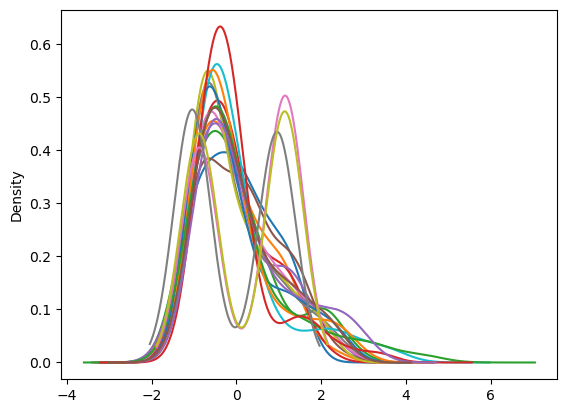

In [75]:
pd.DataFrame(X_test_sc, columns= X_test.columns).plot.kde(legend = False)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr =  LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [78]:
coef_df =  pd.DataFrame(lr.coef_, index = X_train.columns, columns = ['Coef Before Lasso'])
coef_df

,Coef Before Lasso
AtBat,-270.329315
Hits,184.233976
HmRun,10.624640
Runs,50.352431
RBI,43.984221
Walks,79.622627
Years,-48.719154
CAtBat,-332.404426
CHits,239.566774
CHmRun,-42.707451


In [79]:
lasso = Lasso(alpha = 1, max_iter = 10000)
lasso.fit(X_train_sc, y_train)


Lasso(alpha=1, max_iter=10000)

In [80]:
coef_df['Coef After Lasso'] =  lasso.coef_
coef_df

,Coef Before Lasso,Coef After Lasso
AtBat,-270.329315,-279.697433
Hits,184.233976,203.790171
HmRun,10.624640,0.000000
Runs,50.352431,47.452321
RBI,43.984221,52.724462
Walks,79.622627,73.854245
Years,-48.719154,-68.182373
CAtBat,-332.404426,-29.623600
CHits,239.566774,48.199295
CHmRun,-42.707451,-0.000000


In [81]:
print(f'Lasso Intercept {lasso.intercept_:.2f}')

Lasso Intercept 518.67


**Observation**

* Lasso Intercept: 518.67

This is the intercept term of your Lasso regression model. It represents the expected mean value of the dependent variable when all independent variables are set to zero. In practical terms, it's the baseline prediction when no other information (from the variables) is provided.
Lasso Coefficients:

* Lasso coefficients: represent the relationship between each independent variable and the dependent variable.
Each coefficient estimates the change in the dependent variable for a one unit change in the respective independent variable, holding all other variables constant.
    - A positive coefficient indicates that as the independent variable increases, the dependent variable also increases.
    - A negative coefficient indicates that as the independent variable increases, the dependent variable decreases.
    - The magnitude of the coefficient shows the strength of the impact. A larger absolute value indicates a stronger effect.

- Test the lasso model and make predictions
- Evaluate the RMSE and R2 scores for model performance.
- Optimize the model.

In [82]:
y_pred_test_lr =  lr.predict(X_test_sc)
y_pred_test_lasso =  lasso.predict(X_test_sc)
y_pred_train_lr =  lr.predict(X_train_sc)
y_pred_train_lasso =  lasso.predict(X_train_sc)

In [83]:
# Train andTest Data Scores
print(f'R2 Score Linear Regression Train Data {r2_score(y_train,y_pred_train_lr):.2f}')
print(f'RMSE Linear Regression Train Data {np.sqrt(mean_squared_error(y_train,y_pred_train_lr)):.2f}')
print('---------------------------------------------------')
print(f'R2 Score Linear Regression Test Data {r2_score(y_test,y_pred_test_lr):.2f}')
print(f'RMSE Linear Regression Test Data {np.sqrt(mean_squared_error(y_test,y_pred_test_lr)):.2f}')

R2 Score Linear Regression Train Data 0.47
RMSE Linear Regression Train Data 294.66
---------------------------------------------------
R2 Score Linear Regression Test Data 0.42
RMSE Linear Regression Test Data 328.26


In [84]:
print(f'R2 Score Lasso Regression Train Data {r2_score(y_train,y_pred_train_lasso):.2f}')
print(f'RMSE Lasso Regression Train Data {np.sqrt(mean_squared_error(y_train,y_pred_train_lasso)):.2f}')
print('---------------------------------------------------')
print(f'R2 Score Lasso Regression Test Data {r2_score(y_test,y_pred_test_lasso):.2f}')
print(f'RMSE Lasso Regression Test Data {np.sqrt(mean_squared_error(y_test,y_pred_test_lasso)):.2f}')

R2 Score Lasso Regression Train Data 0.46
RMSE Lasso Regression Train Data 295.79
---------------------------------------------------
R2 Score Lasso Regression Test Data 0.42
RMSE Lasso Regression Test Data 329.97


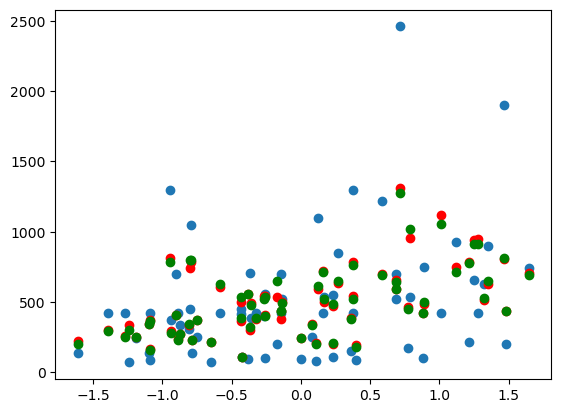

In [85]:
plt.scatter(X_test_sc[:,0],y_test)
plt.scatter(X_test_sc[:,0],y_pred_test_lr, color = 'red')
plt.scatter(X_test_sc[:,0],y_pred_test_lasso, color = 'green')

In [86]:
# finding best Alpha value

lasso_cv =  LassoCV(alphas = np.random.randint(0,100, 100), cv = 5, max_iter = 100000)

In [87]:
lasso_cv.fit(X_train_sc, y_train)

C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8254786.465327006, tolerance: 3147.1454339147804
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sk

LassoCV(alphas=array([55, 64, 75, 92, 36, 25, 32, 42, 14, 86, 28, 20, 82, 68, 22, 99, 83,
        7, 72, 61, 13,  5,  0,  8, 79, 79, 53, 11,  4, 39, 92, 45, 26, 74,
       52, 49, 91, 51, 99, 18, 34, 51, 30, 53, 58, 43, 55, 18, 45, 87, 65,
       70, 53, 48, 94, 59, 80, 26, 35, 58, 49, 73, 44, 13, 70, 38, 39,  8,
       13,  7, 80, 22, 79, 89,  8, 99,  6, 81, 71, 84, 89, 66, 60, 16, 56,
       23, 24,  4, 49, 87, 30, 54, 25, 20, 97, 57, 23, 27, 29, 33]),
        cv=5, max_iter=100000)

In [88]:
print(f'Best Alpha Value {lasso_cv.alpha_}')

Best Alpha Value 18


# Ridge Regression

**Ridge Regression** also known as L2 Regularization is a regularization technique used in linear regression to prevent overfitting. It is useful for handling multicollinear data, where two predictors/independent variables are highly correlated to each other.

*Collinearity* refers to a situation where two or more predictor variables in a multiple regression model are highly correlated, meaning they have a linear relationship. This correlation makes it difficult to determine the individual effect of each predictor on the target variable, leading to unreliable and unstable estimates of regression coefficients.

Ridge regression adds a regularization term to the loss function that penalizes large coefficients in the model and encourages the model to have smaller coefficients.
It results in a simpler and more generalized model.

Ridge Regression does shrink the coefficients, it does not force them to zero, meaning it does not perform feature selection

Mathematically

$$
 \sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2 + \alpha \sum_{j=1}^{p}{\beta_{j}}^2
$$

In [89]:
# Implementation

In [157]:
from sklearn.linear_model import Ridge, RidgeCV

In [158]:
ridge_model =  Ridge(alpha = 1)
ridge_model.fit(X_train_sc, y_train)

Ridge(alpha=1)

In [159]:
coef_df['Coef After Ridge'] =  ridge_model.coef_

In [160]:
coef_df

,Coef Before Lasso,Coef After Lasso,Coef After Ridge
AtBat,-270.329315,-279.697433,-261.674316
Hits,184.233976,203.790171,174.364284
HmRun,10.624640,0.000000,2.494394
Runs,50.352431,47.452321,59.310920
RBI,43.984221,52.724462,50.041228
Walks,79.622627,73.854245,74.171415
Years,-48.719154,-68.182373,-64.924224
CAtBat,-332.404426,-29.623600,-159.908946
CHits,239.566774,48.199295,157.199113
CHmRun,-42.707451,-0.000000,-23.317092


In [161]:
y_pred_test_ridge =  ridge_model.predict(X_test_sc)
y_pred_train_ridge =  ridge_model.predict(X_train_sc)

In [162]:
# Train andTest Data Scores
print(f'R2 Score Linear Regression Train Data {r2_score(y_train,y_pred_train_lr):.2f}')
print(f'RMSE Linear Regression Train Data {np.sqrt(mean_squared_error(y_train,y_pred_train_lr)):.2f}')
print('---------------------------------------------------')
print(f'R2 Score Linear Regression Test Data {r2_score(y_test,y_pred_test_lr):.2f}')
print(f'RMSE Linear Regression Test Data {np.sqrt(mean_squared_error(y_test,y_pred_test_lr)):.2f}')
print('______________________________________________________________________________________________')
print(f'R2 Score Lasso Regression Train Data {r2_score(y_train,y_pred_train_lasso):.2f}')
print(f'RMSE Lasso Regression Train Data {np.sqrt(mean_squared_error(y_train,y_pred_train_lasso)):.2f}')
print('---------------------------------------------------')
print(f'R2 Score Lasso Regression Test Data {r2_score(y_test,y_pred_test_lasso):.2f}')
print(f'RMSE Lasso Regression Test Data {np.sqrt(mean_squared_error(y_test,y_pred_test_lasso)):.2f}')
print('______________________________________________________________________________________________')

print(f'R2 Score Ridge Regression Train Data {r2_score(y_train,y_pred_train_ridge):.2f}')
print(f'RMSE Ridge Regression Train Data {np.sqrt(mean_squared_error(y_train,y_pred_train_ridge)):.2f}')
print('---------------------------------------------------')
print(f'R2 Score Ridge Regression Test Data {r2_score(y_test,y_pred_test_ridge):.2f}')
print(f'RMSE Ridge Regression Test Data {np.sqrt(mean_squared_error(y_test,y_pred_test_ridge)):.2f}')

R2 Score Linear Regression Train Data 0.47
RMSE Linear Regression Train Data 294.66
---------------------------------------------------
R2 Score Linear Regression Test Data 0.42
RMSE Linear Regression Test Data 328.26
______________________________________________________________________________________________
R2 Score Lasso Regression Train Data 0.46
RMSE Lasso Regression Train Data 295.79
---------------------------------------------------
R2 Score Lasso Regression Test Data 0.42
RMSE Lasso Regression Test Data 329.97
______________________________________________________________________________________________
R2 Score Ridge Regression Train Data 0.46
RMSE Ridge Regression Train Data 295.09
---------------------------------------------------
R2 Score Ridge Regression Test Data 0.41
RMSE Ridge Regression Test Data 330.58


In [164]:
ridge_model.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [163]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


In [97]:
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train_sc, y_train)

RandomForestRegressor()

In [98]:
y_pred_test_rfr =  rfr.predict(X_test_sc)
y_pred_train_rfr =  rfr.predict(X_train_sc)

print(f'R2 Score Random Forest Train Data {r2_score(y_train,y_pred_train_rfr):.2f}')
print(f'RMSE Random Forest Train Data {np.sqrt(mean_squared_error(y_train,y_pred_train_rfr)):.2f}')
print('---------------------------------------------------')
print(f'R2 Score Random Forest Test Data {r2_score(y_test,y_pred_test_rfr):.2f}')
print(f'RMSE Random Forest Test Data {np.sqrt(mean_squared_error(y_test,y_pred_test_rfr)):.2f}')

R2 Score Random Forest Train Data 0.93
RMSE Random Forest Train Data 104.74
---------------------------------------------------
R2 Score Random Forest Test Data 0.43
RMSE Random Forest Test Data 327.11


# Model Optimization

## HyperParameter Tuning
While training a model uses certain parameters which are set before the actual trainign of themodel.  These parameters aer called hyperparameters of the model & finding the optimal value for hyperparameters such that model performance is best is hyperparameter tuning.<br>
The common techniques that are used for hyperparameter tuning are
- **GridSearch**
  - It systematically works through multiple combinations of hyperparmeters. it performs exhaustive search on define d parameter grid
  - **How it Works**
    - Define a parameter grid
    - Combination Evaluation
    - Model Training
    - Otimal Parameters
- **RandomSearch**
  - it explores the hyperparameters space by sampling fixed number of parameter settings from the specified distributions.
    - **How it Works**
    - Define a parameter grid
    - Random Sampling of hyperparameters
    - Model Training
    - Otimal Parameters

In [101]:
# Implement Grid Search with cross validation

In [173]:
from sklearn.model_selection import GridSearchCV, KFold

In [105]:
kf  = KFold(n_splits = 10, shuffle  = True, random_state =  42)

In [165]:
param_grid =  {'alpha': np.arange(1, 15, 1)}

In [166]:
model = Ridge()

In [174]:
search =  GridSearchCV(model, param_grid, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 2)

In [175]:
search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='neg_mean_squared_error', verbose=2)

In [176]:
print(f'Best Parameters {search.best_params_}')
print(f'Best Score {search.best_score_}')

Best Parameters {'alpha': 14}
Best Score -107319.31378313717


In [177]:
y_test_pred_best =  search.predict(X_test_sc)

In [178]:
print(r2_score(y_test,y_test_pred_best))

0.38083709401162147


In [153]:
X_test_sc[0]

array([-0.14427573, -0.45916163,  0.48406677, -0.23919057, -0.0069141 ,
        1.11902455, -0.0950372 , -0.50063525, -0.55089475, -0.08897297,
       -0.54899234, -0.38708572, -0.31203174,  1.36430439, -0.05465966,
        0.78211321,  1.14687197,  0.95807643,  1.13782374])

In [155]:
newdata =  np.array([[-0.02, -0.45913,  0.406677, -0.29057, -0.0069141 ,
        1.11902455, -0.0950372 , -0.50063525, -0.55089475, -0.08897297,
       -0.54899234, -0.38708572, -0.3174,  1.36430439, -0.05465966,
        0.78211321,  1.14687197,  0.95807643,  1.13782374]])

In [156]:
search.predict(newdata)

array([409.79449526])

# Sklearn Pipelines

Pipelines provide an organized approach to managing the data preprocessing and modelling code.  they combine the preprocessing and modelling steps into single streamlined process.
- Cleaner Code
- Fewer Bugs
- Easier to productionize

### Importat point to remember 
- A pipeline is sequence of data transformers that can include a final predictor.
- it allows o apply multiple preprocessing steps to the data and optionally end with a predictor for modelling
- Each intermediate step in the pipeline must have a fit and transform methods, while the final step only needs a fit
- The hyperparameters for any step can be set by using its name followed a double underscore `__` and the parameter name.


In [180]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [181]:
df =  pd.read_csv('housing_with_ocean_proximity.csv')

In [182]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [213]:
# Seperate Feature and Target. Assuming median house value as target
X =  df.drop(columns = ['median_house_value'])
y = df['median_house_value']

In [214]:
# Split the data into train and test
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.3, random_state = 25)

In [215]:
print(X_train.info())
print(X_train.isnull().sum())
print(X_train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 8275 to 6618
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14308 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB
None
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        140
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64
          longitude      latitude  housing_median_ag

In [216]:
cat_col =  X_train.select_dtypes(include = 'object').columns
num_col =  X_train.select_dtypes(exclude = 'object').columns
print(cat_col)
print(num_col)

Index(['ocean_proximity'], dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


In [217]:
# let us create a pipeline for data transformation in numerical columns
num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

# let us create a pipeline for data transformation in categorical columns

cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

In [218]:
# unify the data preprocessing with column transformer

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_col), 
    ('cat', cat_pipeline, cat_col)
])

In [219]:
check_train =  preprocessing.fit_transform(X_train)
check_df  = pd.DataFrame(check_train)
check_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.699250,-0.864452,-1.089310,1.016708,2.027926,1.469994,1.897157,-0.919602,0.0,0.0,0.0,0.0,1.0
1,0.819708,-0.803278,-0.133230,-0.032460,-0.545567,-0.476886,-0.485367,2.985466,1.0,0.0,0.0,0.0,0.0
2,0.714308,-0.704457,1.380563,0.247630,-0.255323,-0.283616,-0.200847,3.607619,1.0,0.0,0.0,0.0,0.0


In [220]:
check_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [221]:
# Create the final pipeline to train and predict

In [222]:
model = Ridge()

In [223]:
final_pipeline = Pipeline([
    ('pre', preprocessing),
    ('model_ridge', model)
])

In [224]:
# using GridSearchCV

grid = {'model_ridge__alpha':np.arange(0.1, 2.1, 0.1)}

In [225]:
search =  GridSearchCV(final_pipeline, grid, scoring = 'r2', cv =5)
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['ocean_proximity'], dtype='object'))])),
                                       ('model_ridge', Ridge())]),
             param_grid={'model_ridge__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])},
             scoring='r2')

In [226]:
print(f'Best Parameters {search.best_params_}')
print(f'Best r2 Score {search.best_score_}')

Best Parameters {'model_ridge__alpha': 0.6}
Best r2 Score 0.641608011845501


In [227]:
# Predict on test set

In [228]:
y_test_pred = search.predict(X_test)
y_train_pred = search.predict(X_train)
print(f'R2 score Train data {r2_score(y_train,y_train_pred): .3f}')
print(f'R2 score Test data {r2_score(y_test,y_test_pred): .3f}')
print(f'MSE Test data {mean_squared_error(y_test,y_test_pred): .3f}')
print(f'RMSE Test data {np.sqrt(mean_squared_error(y_test,y_test_pred)): .3f}')
print(f'MAE Test data {mean_absolute_error(y_test,y_test_pred): .3f}')

R2 score Train data  0.644
R2 score Test data  0.648
MSE Test data  4698466495.122
RMSE Test data  68545.361
MAE Test data  50043.288


In [235]:
rawinput =  X_train.sample()

In [236]:
rawinput

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18848,-122.37,41.41,28.0,1729.0,419.0,929.0,370.0,1.27,INLAND


In [237]:
search.predict(rawinput)

array([11762.65323308])